# Relax challenge
Bring in two datasets 

Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period ,  identify  which  factors  predict  future  user
adoption .

table 1: A  user  table  ( "takehome_users" )  with  data  on  12,000  users  who  signed  up  for  the
product  in  the  last  two  years. 

table 2: A  usage  summary  table  ( "takehome_user_engagement" )  that  has  a  row  for  each  day
that  a  user  logged  into  the  product.

## Package and Data Load
### Load Packages

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import re



### Load Data

In [2]:
# Users data
users=pd.read_csv('takehome_users.csv',encoding='latin-1')
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
# Engagement data
engagement=pd.read_csv('takehome_user_engagement.csv')

engagement.info()
engagement.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


## Create response variable
### ID Adopted Users
Defining  an  "adopted  user"   as  a  user  who   has  logged  into  the  product  on  three  separate
days  in  at  least  one  seven­day  period

In [4]:
engagement['time_stamp']=pd.to_datetime(engagement['time_stamp'])
engagement.info()
engagement.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
# create function
# identify users with 3 logins in a 7 day period
def three_in_seven(df, days=7, logins=3):
    # first drop duplicate days and sort by day
    df['date'] = df['time_stamp'].dt.date
    #sort by date
    df = df.drop_duplicates(subset='date').sort_values('date')
    # calculate elapsed days for every n logins, both defined in app
    elapsed_days = df['date'].diff(periods=logins-1)
    # check itime to reach 3 logins is <= 7 days
    return any(elapsed_days <= timedelta(days=days))

In [6]:
# create function
# identify users with 3 logins in a 7 day period
def three_in_seven(df, days=7, logins=3):
    # first drop duplicate days and sort by day
    df['date'] = df['time_stamp'].dt.date
    #sort by date
    df = df.drop_duplicates(subset='date').sort_values('date')
    # calculate elapsed days for every n logins, both defined in app
    elapsed_days = df['date'].diff(periods=logins-1)
    # check if time to reach 3 logins is <= 7 days
    return any(elapsed_days <= timedelta(days=days))


#use function to ID users
adopted_user = engagement.groupby('user_id').apply(three_in_seven)
adopted_user.head()


user_id
1    False
2     True
3    False
4    False
5    False
dtype: bool

In [7]:
adopted_df = pd.DataFrame(adopted_user)
adopted_df.reset_index(inplace=True)
adopted_df = adopted_df.rename(columns = {0:'adopted'})
adopted_df.head()

,user_id,adopted
0,1,False
1,2,True
2,3,False
3,4,False
4,5,False


In [27]:
# left join user data and "adopted user" variable
data = pd.merge(left=users, right=adopted_df,  how='inner', left_on='object_id',right_on='user_id')
data=data.drop(columns="user_id")

data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   int64  
 1   creation_time               8823 non-null   object 
 2   name                        8823 non-null   object 
 3   email                       8823 non-null   object 
 4   creation_source             8823 non-null   object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    8823 non-null   int64  
 7   enabled_for_marketing_drip  8823 non-null   int64  
 8   org_id                      8823 non-null   int64  
 9   invited_by_user_id          4776 non-null   float64
 10  adopted                     8823 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 766.8+ KB


# EDA and Feature Engineering

In [29]:
adopted_true= data[data['adopted']==True]

# Percent of adopted clients
print(len(adopted_true)/len(data))

0.18769126147568854


In [10]:

#data['domain']= re.search("@[\w.]+", data['email'])


<AxesSubplot:xlabel='adopted', ylabel='count'>

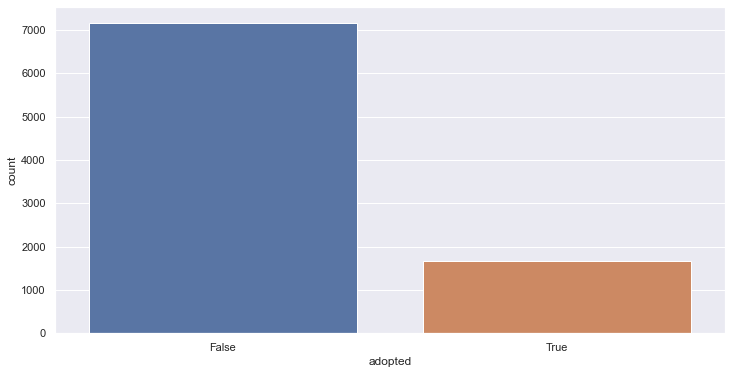

In [30]:
sns.countplot(x ='adopted', data = data)


<AxesSubplot:xlabel='creation_source', ylabel='count'>

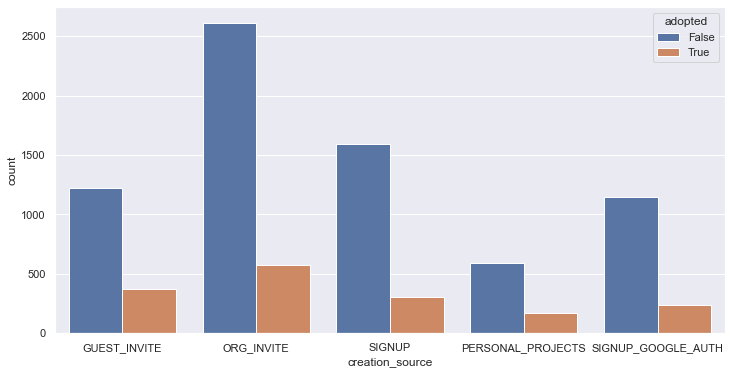

In [31]:
sns.countplot(x ='creation_source', data = data, hue='adopted')


<AxesSubplot:xlabel='opted_in_to_mailing_list', ylabel='count'>

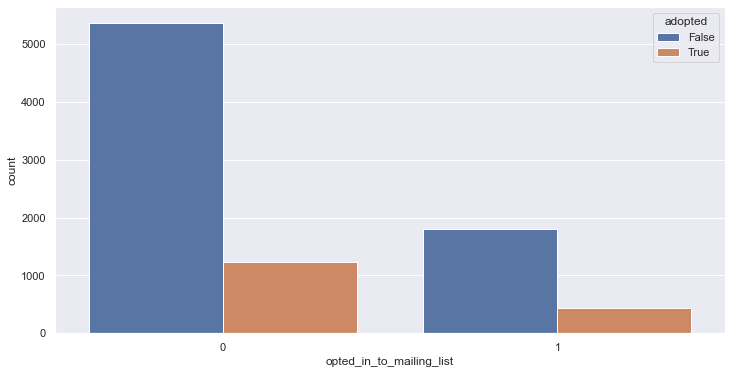

In [32]:
sns.countplot(x ='opted_in_to_mailing_list', data = data, hue='adopted')


<AxesSubplot:xlabel='enabled_for_marketing_drip', ylabel='count'>

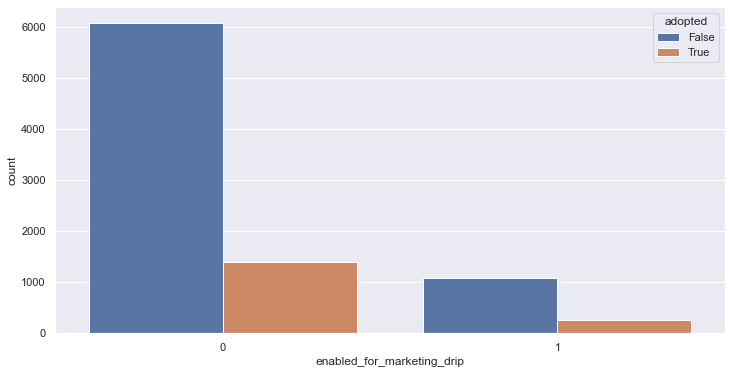

In [35]:
sns.countplot(x ='enabled_for_marketing_drip', data = data, hue='adopted')

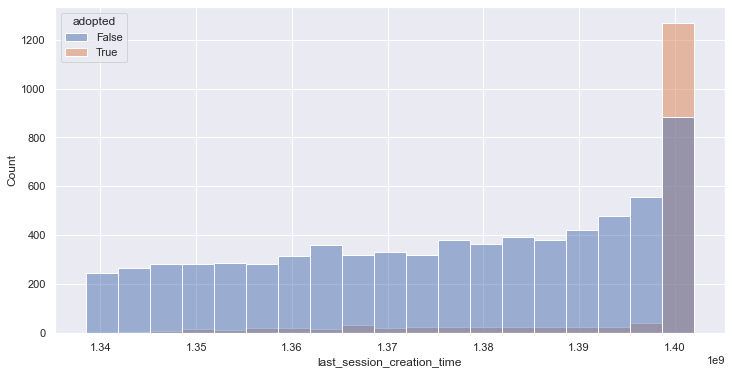

In [33]:
sns.histplot(x ='last_session_creation_time', data = data, hue='adopted')
sns.set(rc = {'figure.figsize':(12,6)})


<AxesSubplot:xlabel='creation_source', ylabel='last_session_creation_time'>

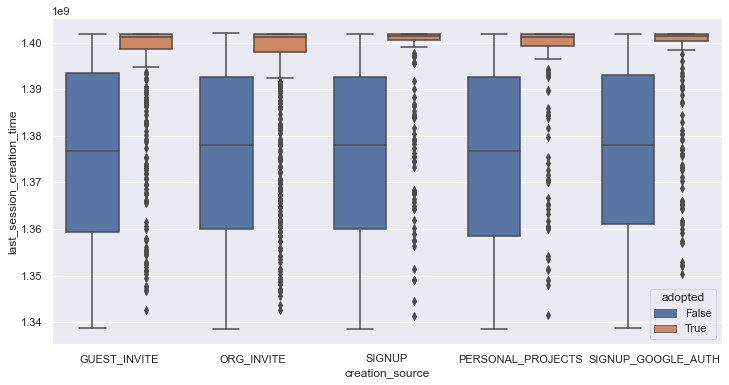

In [34]:
sns.boxplot(y="last_session_creation_time",x='creation_source', data=data, hue="adopted")


## Observations from EDA

We can make the following observations from the limited plots above:
1. Adopted users consist of ~13% of total users
2. Users with either the creation sources of Guest or personal projects are more likely than others
3. Users who opted into the mailing list have a slightly higher adoption rate (21 vs 18%)
4. last session creation time seems to be very important for determining adoption over a seven day period of atleast 3 visits. A majority were adopted ~1.4. It is possible this timing relates to a promotion. (?) 

## Impute and model

Impute model creation time using mean imputation


In [36]:
data_prep=data
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   int64  
 1   creation_time               8823 non-null   object 
 2   name                        8823 non-null   object 
 3   email                       8823 non-null   object 
 4   creation_source             8823 non-null   object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    8823 non-null   int64  
 7   enabled_for_marketing_drip  8823 non-null   int64  
 8   org_id                      8823 non-null   int64  
 9   invited_by_user_id          4776 non-null   float64
 10  adopted                     8823 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 1.0+ MB


In [39]:
trips_processing=pd.get_dummies(data_prep, columns=['creation_source'], drop_first=True)

# drop non-relevant columns
trips_processing=trips_processing.drop(columns=['name', 'creation_time','object_id','email', 'invited_by_user_id'])

trips_processing.head()

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1.398139e+09,1,0,11,False,0,0,0,0
1,1.396238e+09,0,0,1,True,1,0,0,0
2,1.363735e+09,0,0,94,False,1,0,0,0
3,1.369210e+09,0,0,1,False,0,0,0,0
4,1.358850e+09,0,0,193,False,0,0,0,0


In [42]:
y = trips_processing['adopted']
X = trips_processing.drop('adopted', axis=1)
# RF isn't impacted by distance so no need to scale data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, stratify=y, random_state=125)
# use random forest model with balanced class weights to correct for imbalance in the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# use CV to tune number of trees
params = {'n_estimators': [10, 25, 50, 150]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('Optimum parameters were', model.best_params_)
print('Best model precision', model.best_score_)

Optimum parameters were {'n_estimators': 50}
Best model precision 0.8781929287324195


In [46]:
# evluation of the model
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

model = RandomForestClassifier(
    random_state=125, class_weight='balanced', n_estimators=50
)
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, y_pred))
print(classification_report(ytest, y_pred))

Accuracy of test set was 0.8862194016319129
              precision    recall  f1-score   support

       False       0.92      0.95      0.93      1792
        True       0.73      0.63      0.68       414

    accuracy                           0.89      2206
   macro avg       0.82      0.79      0.80      2206
weighted avg       0.88      0.89      0.88      2206



In [49]:
cm = confusion_matrix(ytest, y_pred)
print(cm)

[[1694   98]
 [ 153  261]]


In [51]:
# Calculate feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)
print(importance)

last_session_creation_time            0.713012
org_id                                0.249344
enabled_for_marketing_drip            0.007323
creation_source_ORG_INVITE            0.007233
opted_in_to_mailing_list              0.007126
creation_source_SIGNUP                0.006275
creation_source_SIGNUP_GOOGLE_AUTH    0.005105
creation_source_PERSONAL_PROJECTS     0.004582
dtype: float64


## Discussion
The accuracy of the model was ~88.6% which appears to be high. However if we consider that we are most interested in predicting the "adoption" of new users and this group represents ~19% of the total data we can see there's room for improvement.  The model correctly predicted an adopted user 73% of the time. 
The most important features are the last session creation time and org_id.  More recent users are more likely to be adopted.  In order to encourage continuous doption the company should target outreach to more recent users and provide user support to avoid attrition. Additionally Relax should work with organization IDs with low conversion to see what can be done to increase the experience of users at those companies.